# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Bunachita, Aidan Joseph\
_Student No._: 2020-10991\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Aidan Joseph Quesada Bunachita**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


[1.960174369326708e-27, 0.10657144606377446, 0.4825964348886672, 1.3474290755486773, 3.3102787341230617, 8.186352186031616, 22.480725961488716, 77.77432105361017, 439.9447425203866, 11211.147480015594, 101447.95408843648, 11219.627915345702, 443.3617727711466, 79.99633055637933, 24.150563318754845, 9.534979184310732, 4.444428076695526, 2.3200188906598975, 1.3150113362088491, 0.7935755139459285, 0.5031415919373363, 0.3320038527231605, 0.2264337965891788, 0.15878555422576823, 0.11402238307241268, 0.08357654596017541, 0.06236936996746427, 0.04728607836803167, 0.0363588488652613, 0.028311626286780644, 0.022297591925584326, 0.017743061916368104, 0.014252116773698868, 0.011546901607911643, 0.009429427989860717, 0.007756643537937435, 0.00642386415636436, 0.005353580297801295, 0.004487778460563723, 0.003782599827482012, 0.0032045763121009542, 0.0027279461589080852, 0.00233271797771681, 0.0020032599287714017, 0.001727261547154982, 0.0014949627767076865, 0.001298576509264452, 0.00113185255693192

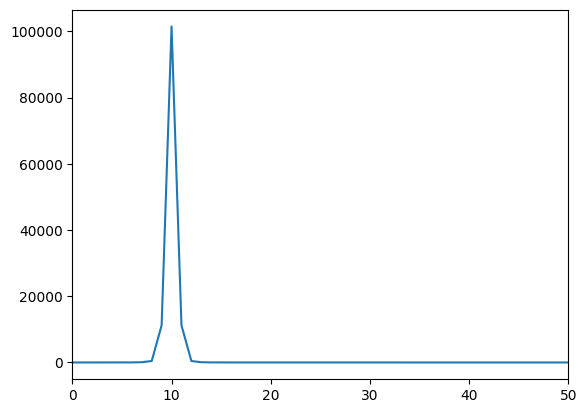

In [8]:
from math import pi, sin
from cmath import exp

import numpy as np
import matplotlib.pyplot as plt

def DFT(f, N):
    yn = [f(n) for n in range(N)]       # generating y_n using the function f that's passed
    cn = []                             # initializing list for our coefficients c_n

    for k in range(N//2 + 1):           # calculating only half the coefficients
        ck = 0
        for n in range(N):              # summation statement for each c_k in the Fourier Transform
            ck += yn[n] * exp(-1j * 2*pi*k*n/N)
        cn.append(ck)

    return cn

N = 1000


msin = lambda x: sin(pi*x/N) * sin(20*pi*x/N)

cn = DFT(msin, N)

mag = [np.real(ck * np.conj(ck)) for ck in cn]
print(mag)
plt.xlim(0,50)
plt.plot(range(501),mag)
plt.show()

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

## Google Drive steps [skipped for now; still troubleshooting]

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [6]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
!ls drive/My\ Drive

'ls' is not recognized as an internal or external command,
operable program or batch file.


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

## Code Proper

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [5]:
import numpy as np
dow = np.loadtxt("dow.txt")

array([12121.71, 12136.44, 12226.73, ..., 11499.25, 11491.91, 11478.13])

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

Now you can start to write code for this problem!

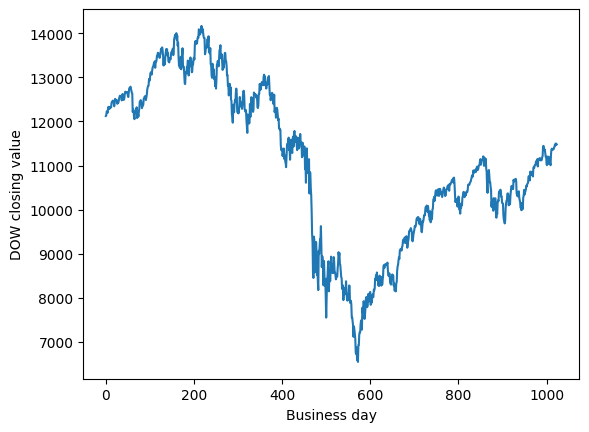

In [30]:
import matplotlib.pyplot as plt     # importing it again for convenience

plt.plot(dow)                       # graphing data - DOW closing value vs. business day
plt.xlabel("Business day")
plt.ylabel("DOW closing value")
plt.show()

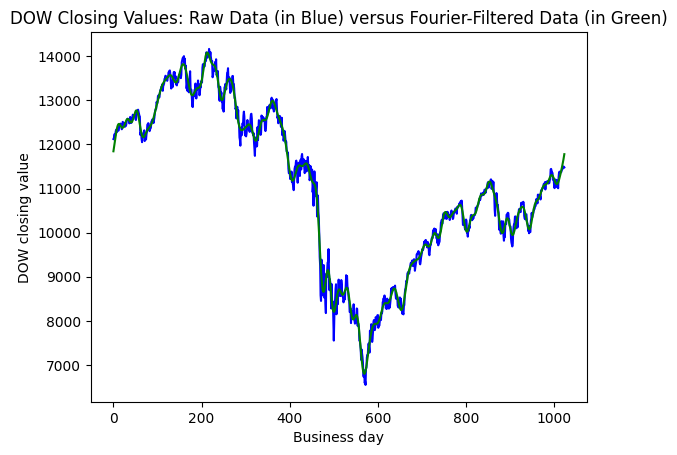

In [32]:
from numpy import fft

dow_trans = fft.rfft(dow)

for x in range(len(dow_trans)):
    if x > len(dow_trans) // 10:        # iterates through FFT'ed data, checks if the coefficient belongs to the last 90% of coefficients, then sets it to ZERO if so
        dow_trans[x] = 0

dow_trans = fft.irfft(dow_trans)       # inverts the FFT we did on the data, AFTER we removed the last 90% of coefficients.

plt.plot(dow, 'b')
plt.plot(dow_trans, 'g')
plt.xlabel("Business day")
plt.ylabel("DOW closing value")
plt.title("DOW Closing Values: Raw Data (Blue) versus Fourier-Filtered Data (Green)")
plt.show()

It seems like a lot of the more **short-term changes** in value have been smoothed out in the Fourier-Filtered data, resulting in a less jagged graph that preserves the more long-term trends present. 

This makes sense: the last 90% of our Fourier Coefficients belong to the terms with higher frequencies. So, setting them to zero 'removes' these terms from our Fourier Series, which is equivalent to suppressing the more short-term (i.e. higher-frequency) fluctuations in our data.